In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
from itertools import product
import numpy as np
from utils import *
import time
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
tstamp = time.perf_counter_ns()

In [3]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
hB,hI = hdf.loc[:,('blocked mean','interleaved mean')].values.T

In [4]:
### RUN EXP
def run_batch_exp(ns,args):
  dataL = []
  for i in range(ns):
    task = Task()
    sem = SEM(args['sch'])
    exp,curr  = task.generate_experiment(**args['exp'])
    data = sem.run_exp(exp)
    data['exp']=exp
    dataL.append(data)
  return dataL

In [5]:
### analyze data

def get_sm(xth):
  """ 
  given x_t_hat from subject
  [trial,layer,node]
  get 2afc normalized softmax for layer 2/3
  return: [trial,layer2/3,node56/78]
  """
  nodes = {2:(5,6),3:(7,8)} 
  L = [] # layer 2 and 3
  for l,ns in nodes.items():
    y = softmax(xth[:,l,ns],-1)
    L.append(y)
  return np.array(L)

def get_acc(data):
  """ 
  returns 2afc softmax of 
  layer 2/3 transitions
  """
  ysm = get_sm(data['xth'])
  L = []
  for i in range(2):
    ysml = ysm[i]
    yt = data['exp'][:,i+3] 
    pr_yt = ysml[range(len(ysml)),yt - (5+2*i)] # 
    L.append(pr_yt)
  return np.array(L)

In [6]:
alfaL = np.arange(1.5,4,0.25)
betaL = np.arange(0.01,0.05,0.005)
lmdaL = np.arange(0.1,0.9,0.1)
param_setsize = len(alfaL)*len(betaL)*len(lmdaL)
print(param_setsize)
print(alfaL,betaL,lmdaL)


expargs = {
  'condition':'blocked',
  'n_train':160,
  'n_test':40
}
ns = 15

640
[1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75] [0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045] [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]


In [7]:
L = []
for idx,(alfa,beta,lmda) in enumerate(product(alfaL,betaL,lmdaL)):
  params = alfa,beta,lmda
  print(idx/param_setsize,alfa,beta,lmda)
  schargs = {
    'concentration':alfa,
    'stickiness':beta,
    'sparsity':lmda
  }
  args = {
    'sch':schargs,
    'exp':expargs
  }
  dataL = run_batch_exp(ns,args)
  acc = np.array([get_acc(data) for data in dataL]) # sub,layer,trial
  acc = acc.mean(1) # mean over layers
  mB = acc.mean(0)
  mse = np.mean((mB - hB)**2)
  ## record
  D = {**schargs,'mse':mse}
  L.append(D)


0.0 1.5 0.01 0.1
0.0015625 1.5 0.01 0.2
0.003125 1.5 0.01 0.30000000000000004
0.0046875 1.5 0.01 0.4
0.00625 1.5 0.01 0.5
0.0078125 1.5 0.01 0.6
0.009375 1.5 0.01 0.7000000000000001
0.0109375 1.5 0.01 0.8
0.0125 1.5 0.015 0.1
0.0140625 1.5 0.015 0.2
0.015625 1.5 0.015 0.30000000000000004
0.0171875 1.5 0.015 0.4
0.01875 1.5 0.015 0.5
0.0203125 1.5 0.015 0.6
0.021875 1.5 0.015 0.7000000000000001
0.0234375 1.5 0.015 0.8
0.025 1.5 0.019999999999999997 0.1
0.0265625 1.5 0.019999999999999997 0.2
0.028125 1.5 0.019999999999999997 0.30000000000000004
0.0296875 1.5 0.019999999999999997 0.4
0.03125 1.5 0.019999999999999997 0.5
0.0328125 1.5 0.019999999999999997 0.6
0.034375 1.5 0.019999999999999997 0.7000000000000001
0.0359375 1.5 0.019999999999999997 0.8
0.0375 1.5 0.024999999999999998 0.1
0.0390625 1.5 0.024999999999999998 0.2
0.040625 1.5 0.024999999999999998 0.30000000000000004
0.0421875 1.5 0.024999999999999998 0.4
0.04375 1.5 0.024999999999999998 0.5
0.0453125 1.5 0.024999999999999998 0.6


0.371875 2.25 0.034999999999999996 0.7000000000000001
0.3734375 2.25 0.034999999999999996 0.8
0.375 2.25 0.039999999999999994 0.1
0.3765625 2.25 0.039999999999999994 0.2
0.378125 2.25 0.039999999999999994 0.30000000000000004
0.3796875 2.25 0.039999999999999994 0.4
0.38125 2.25 0.039999999999999994 0.5
0.3828125 2.25 0.039999999999999994 0.6
0.384375 2.25 0.039999999999999994 0.7000000000000001
0.3859375 2.25 0.039999999999999994 0.8
0.3875 2.25 0.045 0.1
0.3890625 2.25 0.045 0.2
0.390625 2.25 0.045 0.30000000000000004
0.3921875 2.25 0.045 0.4
0.39375 2.25 0.045 0.5
0.3953125 2.25 0.045 0.6
0.396875 2.25 0.045 0.7000000000000001
0.3984375 2.25 0.045 0.8
0.4 2.5 0.01 0.1
0.4015625 2.5 0.01 0.2
0.403125 2.5 0.01 0.30000000000000004
0.4046875 2.5 0.01 0.4
0.40625 2.5 0.01 0.5
0.4078125 2.5 0.01 0.6
0.409375 2.5 0.01 0.7000000000000001
0.4109375 2.5 0.01 0.8
0.4125 2.5 0.015 0.1
0.4140625 2.5 0.015 0.2
0.415625 2.5 0.015 0.30000000000000004
0.4171875 2.5 0.015 0.4
0.41875 2.5 0.015 0.5
0.42

0.74375 3.25 0.024999999999999998 0.5
0.7453125 3.25 0.024999999999999998 0.6
0.746875 3.25 0.024999999999999998 0.7000000000000001
0.7484375 3.25 0.024999999999999998 0.8
0.75 3.25 0.03 0.1
0.7515625 3.25 0.03 0.2
0.753125 3.25 0.03 0.30000000000000004
0.7546875 3.25 0.03 0.4
0.75625 3.25 0.03 0.5
0.7578125 3.25 0.03 0.6
0.759375 3.25 0.03 0.7000000000000001
0.7609375 3.25 0.03 0.8
0.7625 3.25 0.034999999999999996 0.1
0.7640625 3.25 0.034999999999999996 0.2
0.765625 3.25 0.034999999999999996 0.30000000000000004
0.7671875 3.25 0.034999999999999996 0.4
0.76875 3.25 0.034999999999999996 0.5
0.7703125 3.25 0.034999999999999996 0.6
0.771875 3.25 0.034999999999999996 0.7000000000000001
0.7734375 3.25 0.034999999999999996 0.8
0.775 3.25 0.039999999999999994 0.1
0.7765625 3.25 0.039999999999999994 0.2
0.778125 3.25 0.039999999999999994 0.30000000000000004
0.7796875 3.25 0.039999999999999994 0.4
0.78125 3.25 0.039999999999999994 0.5
0.7828125 3.25 0.039999999999999994 0.6
0.784375 3.25 0.03999

# best fit

concentration    2.25000
stickiness       0.03000
sparsity         0.10000
mse              0.13842
Name: 224, dtype: float64


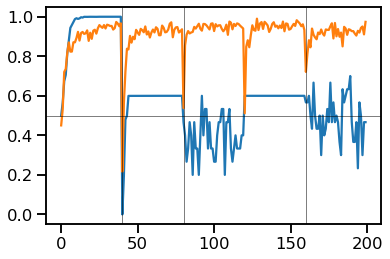

In [9]:
best_param = gsdf.iloc[0]
a,b,l,m = best_param
print(best_param)
schargs_prime = {
  'concentration':a,
  'stickiness':b,
  'sparsity':l
}
args = {
  'sch':schargs_prime,
  'exp':expargs
  }
dataL = run_batch_exp(ns,args)
acc = np.array([get_acc(data) for data in dataL]) # sub,layer,trial
acc = acc.mean(1) # mean over layers
mB = acc.mean(0)
## plot
plt.plot(mB)
plt.plot(hB)
plt.axhline(0.5,c='k',lw=0.5)
for v in [40,80,160]:
  plt.axvline(v,c='k',lw=0.5)
plt.savefig('figures/scratch/bestfitGS-%i'%tstampbestfitGS-7562171286.png)

# analysis

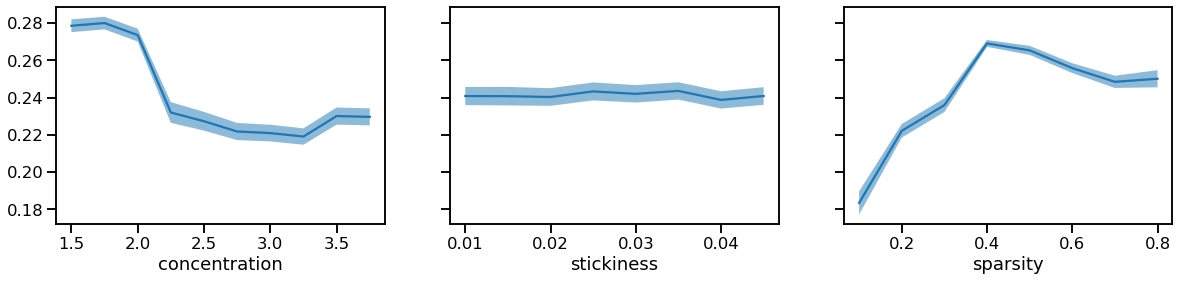

In [11]:
pL = ['concentration','stickiness','sparsity']
f,axa = plt.subplots(1,3,figsize=(20,4),sharey=True)
for i in range(3):
  ax = axa[i]
  msegroup = gsdf.groupby(pL[i]).mse
  M = msegroup.mean()
  S = msegroup.std()/np.sqrt(msegroup.count())
  ax.plot(M)
#   ax.bar(M,yerr=S)
  ax.fill_between(M.index,M+S,M-S,alpha=0.5)
  ax.set_xlabel(pL[i])

plt.savefig('figures/scratch/mse-by-param-%i'%tstamp)

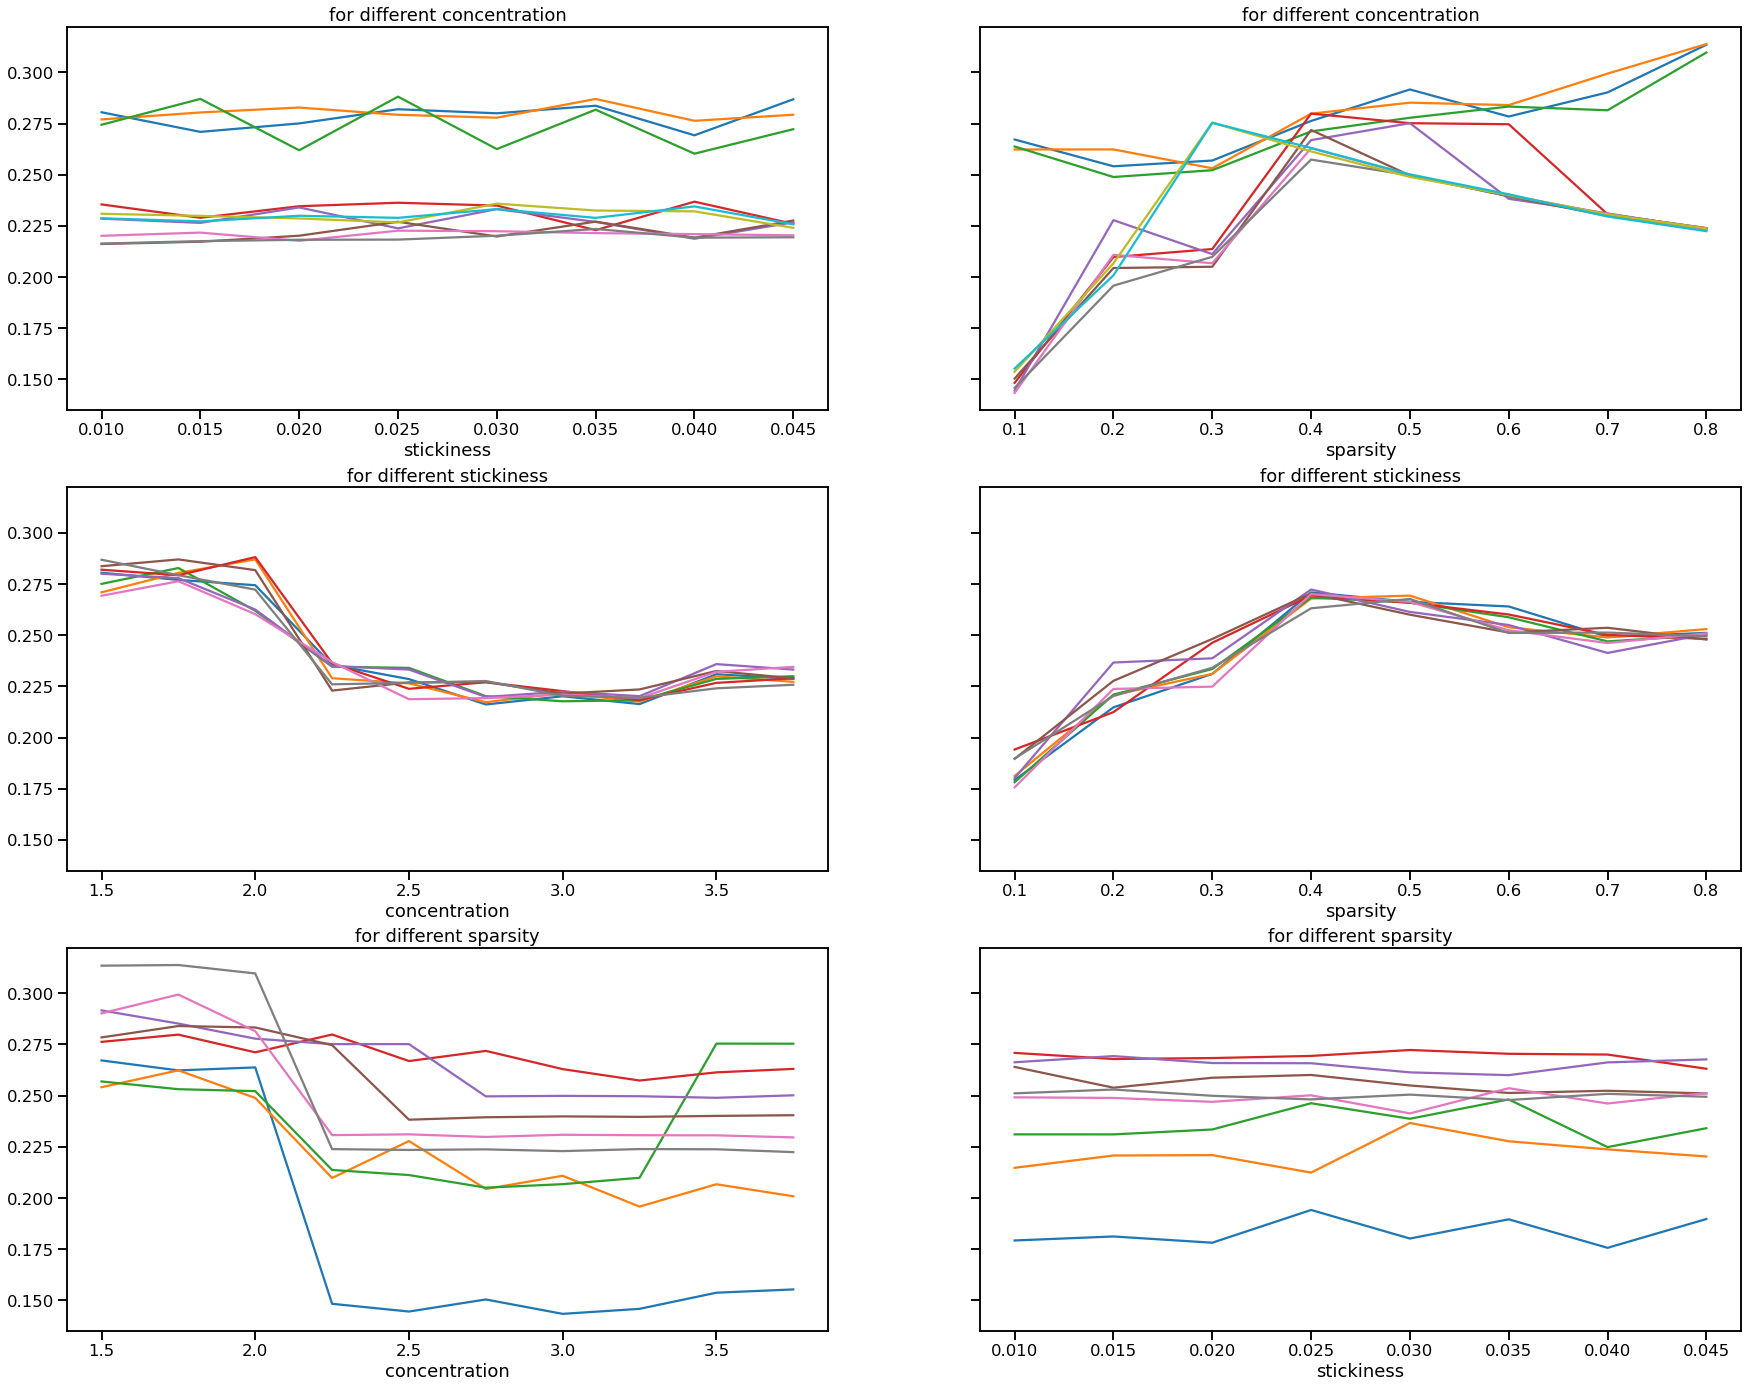

In [12]:
f,axa = plt.subplots(3,2,figsize=(30,24),sharey=True)
for oi,outvar in enumerate(pL):
  ii=-1
  for invar in pL:
    if outvar==invar: continue
    ii+=1
    ax = axa[oi,ii]
    for oval,d in gsdf.groupby([outvar,invar]).mean().groupby(outvar):
      xplt = d.reset_index().loc[:,invar]
      yplt = d.mse.values
      ax.set_title('for different '+outvar)
      ax.plot(xplt,yplt)
      ax.set_xlabel(invar)
      
plt.savefig('figures/scratch/mse-by-paramXparam-%i'%tstamp)